# TP 2
## Parte 2 - Gradientes

Para la imagen suministrada “metal grid”.
Implementar un algoritmo que
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con colores las direcciones de gradientes más representativos.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import glob

matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)

In [2]:
# Colores para los gradientes
ROJO  = [255,0,0]
VERDE = [0,255,0]
AZUL  = [0,0,255]
MAGENTA = [255,0,255]
CYAN = [0,255,255]
AMARILLO = [255,255,0]


### Cálculo de gradientes

In [3]:
img = cv.imread('images/metalgrid.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


# Suavizado Gaussiano
blur = cv.GaussianBlur(gray,(5,5),0)

# Gradientes

# Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

# Lo mismo para Sobely
sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# Calculamos la Magnitud y la pasamos a 8-bit
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

# Supresión de no-máximos e identificación de gradientes por color

# Encontramos los píxels vecinos (b,c) en la dirección (redondeadea) del gradiente y aplicamos la supresión de no-máximos
# Además construimos una matriz para identificar los gradientes por color
M, N = mag.shape
Non_max = np.zeros((M,N), dtype= np.uint8)       # matriz de no-máximos
img_grad = np.zeros((M,N,3), dtype= np.uint8)    # matriz para identificar distintos gradientes por color

for i in range(1,M-1):
    for j in range(1,N-1):
       # Horizontal 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180) or (-22.5 <= angle[i,j] < 0) or (-180 <= angle[i,j] < -157.5):
            b = mag[i, j+1]
            c = mag[i, j-1]
        # Diagonal 45
        elif (22.5 <= angle[i,j] < 67.5):
            b = mag[i+1, j+1]
            c = mag[i-1, j-1]
            img_grad[i,j] = ROJO
        elif (-157.5 <= angle[i,j] < -112.5):
            b = mag[i+1, j+1]
            c = mag[i-1, j-1]
            img_grad[i,j] = VERDE
        # Vertical 90
        elif (67.5 <= angle[i,j] < 112.5):
            b = mag[i+1, j]
            c = mag[i-1, j]
            img_grad[i,j] = AZUL
        elif (-112.5 <= angle[i,j] < -67.5):
            b = mag[i+1, j]
            c = mag[i-1, j]
            img_grad[i,j] = MAGENTA
        # Diagonal 135
        elif (112.5 <= angle[i,j] < 157.5):
            b = mag[i+1, j-1]
            c = mag[i-1, j+1]           
            img_grad[i,j] = CYAN
        elif (-67.5 <= angle[i,j] < -22.5):
            b = mag[i+1, j-1]
            c = mag[i-1, j+1]           
            img_grad[i,j] = AMARILLO
            
        # Supresión de no-máximos
        if (mag[i,j] >= b) and (mag[i,j] >= c):
            Non_max[i,j] = mag[i,j]

# Umbralizado por histéresis
UmbralAlto = 21
UmbralBajo = 15

M, N = Non_max.shape
out = np.zeros((M,N), dtype= np.uint8)

# Si la intensidad de un borde es mayor a 'UmbralAlto' es seguro un umbral, debajo de 'UmbralBajo' seguro no es
strong_i, strong_j = np.where(Non_max >= UmbralAlto)
zeros_i, zeros_j = np.where(Non_max < UmbralBajo)

# Bordes débiles
weak_i, weak_j = np.where((Non_max <= UmbralAlto) & (Non_max >= UmbralBajo))

# Los gradientes que me interesa colorear son únicamente los representativos (fuertes)
img_grad[weak_i, weak_j] = [0,0,0]
img_grad[zeros_i, zeros_j] = [0,0,0]


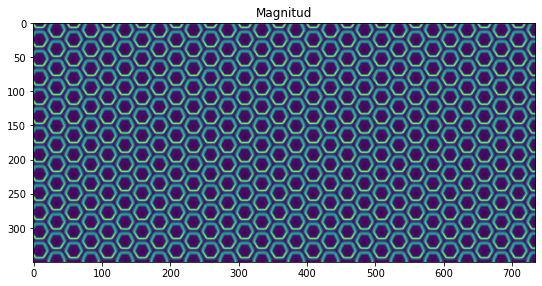

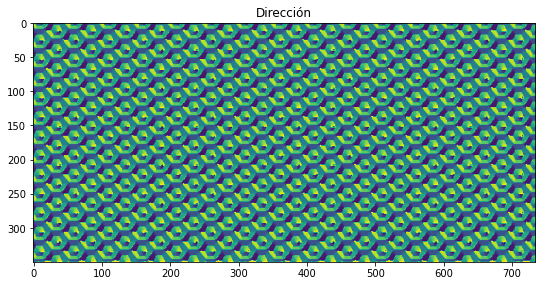

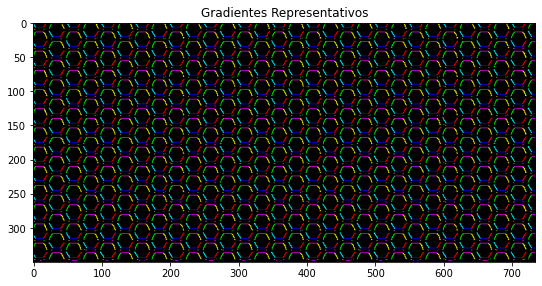

In [4]:
# Ploteamos las imágenes
plt.imshow(mag)
plt.title('Magnitud');plt.show()
plt.imshow(angle)
plt.title('Dirección');plt.show()
plt.imshow(img_grad)
plt.title('Gradientes Representativos');plt.show()